In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from drawdata import ScatterWidget

plt.style.use("dark_background")
pd.options.display.float_format = "{:.3f}".format

In [3]:
widget = ScatterWidget()
widget

ScatterWidget()

In [20]:
X, y = widget.data_as_X_y
X = pd.DataFrame(X, columns=["x1", "x2"])
y = pd.Series(y, name="label")
y = y.map({'#1f77b4': 0, '#ff7f0e': 1})

In [22]:
data = pd.DataFrame(pd.concat([X, y], axis=1))
data.head()

,x1,x2,label
0,130.439,187.289,0
1,102.564,182.665,0
2,134.489,195.947,0
3,121.279,182.132,0
4,125.942,172.391,0


<Axes: xlabel='x1', ylabel='x2'>

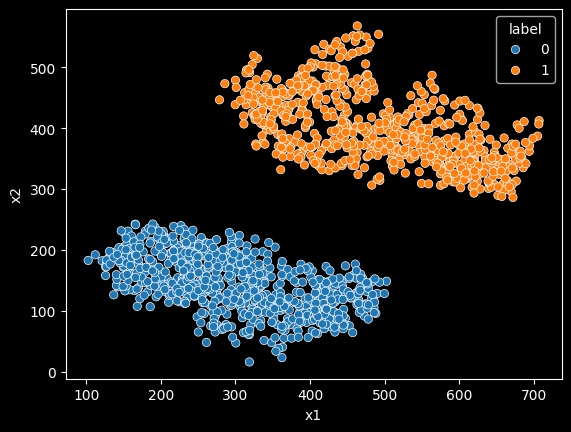

In [23]:
sns.scatterplot(data, hue="label", x="x1", y="x2", palette=["#1f77b4", "#ff7f0e"])

In [24]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [27]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"Training accuracy: {accuracy:.2%}")

Training accuracy: 100.00%


In [33]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

$
w1 x + w2 y + b = 0  
$  
$
w2 y = -b - w1 x
$

In [35]:
equation = (- b - w1 * X['x1']) / w2

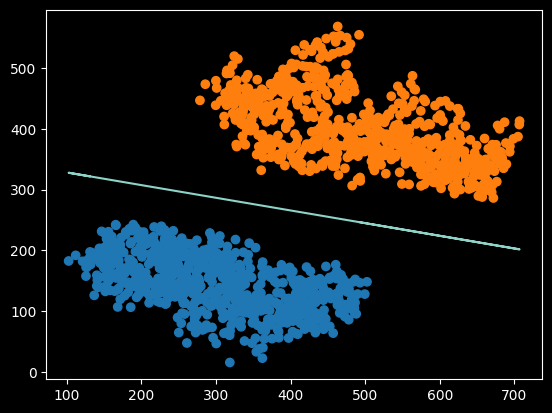

In [50]:
plt.plot(X['x1'], equation)
plt.scatter(X['x1'], X['x2'], c=y.map({0: '#1f77b4', 1: '#ff7f0e'}))

In [45]:
print(f"b = {float(b)}")

b = -50.353094465214575
